# Network Analysis

## 1.1 Centrality Measures
Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in 
the underground network. Give the definition of each of the measures (including their equation), put 
the measures into the context of the underground, and why they will allow you to find the stations that 
are most crucial for the functioning of the underground. Compute the measures for your nodes in the 
network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures.  

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from operator import itemgetter
import copy
import warnings
warnings.filterwarnings('ignore')

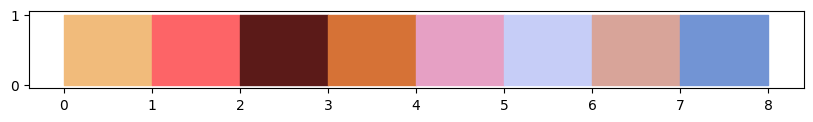

In [3]:
# Now import my favourite colour palette:
gbp_colors = ["#F1BB7B", "#FD6467", "#5B1A18", "#D67236", "#E6A0C4", "#C6CDF7", "#D8A499", "#7294D4"]

# Now let's plot color pallette
plt.figure(figsize=(10, 1))
for i, color in enumerate(gbp_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)


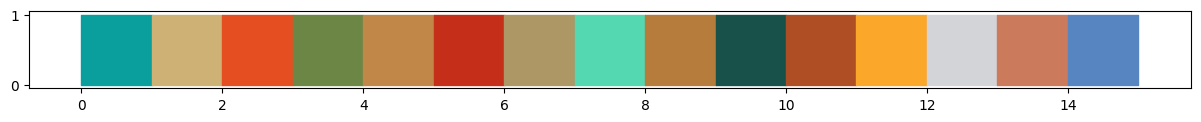

In [119]:
# Now import my favourite colour palette:
asteroid_city_col = ["#0A9F9D", "#CEB175", "#E54E21", "#6C8645", "#C18748", 
                     "#C52E19", "#AC9765", "#54D8B1", "#b67c3b", "#175149", 
                     "#AF4E24", "#FBA72A", "#D3D4D8", "#CB7A5C", "#5785C1"]

# Now let's plot color pallette
plt.figure(figsize=(15, 1))
for i, color in enumerate(asteroid_city_col):
    plt.fill_between([i, i + 1], 0, 1, color=color)

### 1.1.0 Read the data, and explore the network:

In [84]:
# make multiple copies of the graph
london_graph = nx.read_graphml('london_updated.graph')
london_graph3a = nx.read_graphml('london_updated.graph')
london_graph3b = nx.read_graphml('london_updated.graph')

In [95]:
# convert str into tuple:
for node in london_graph.nodes():
    london_graph.nodes[node]['coords'] = eval(london_graph.nodes[node]['coords'])

In [96]:
# convert str into tuple:
for node in london_graph3a.nodes():
    london_graph3a.nodes[node]['coords'] = eval(london_graph3a.nodes[node]['coords'])

In [97]:
# convert Str into tuple:
for node in london_graph3b.nodes():
    london_graph3b.nodes[node]['coords'] = eval(london_graph3b.nodes[node]['coords'])

In [8]:
# Take a look at our data
print("number of nodes: ",london_graph.number_of_nodes())
print("number of edges: ",london_graph.number_of_edges())

number of nodes:  401
number of edges:  467


In [9]:
list(london_graph.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [10]:
# To check edges attributes:
list(london_graph.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.771558050728, 'line_name': 'Jubilee', 'flows': 12356})

In [11]:
counter = 0
# Iterate through each node and print its attributes
for node, attrs in london_graph.nodes(data=True):
    print(f"Node: {node}, Attributes: {attrs}")
   
    # check first 10
    counter += 1
    if counter == 10:
        break  # Exit the loop

Node: Wembley Park, Attributes: {'coords': (519316.5590174915, 186389.32981656672)}
Node: Kingsbury, Attributes: {'coords': (519359.9688603217, 188721.22027255013)}
Node: Queensbury, Attributes: {'coords': (518811.3613368616, 189760.50737704366)}
Node: Canons Park, Attributes: {'coords': (518183.29968291725, 191257.26260848)}
Node: Stanmore, Attributes: {'coords': (517580.4596464033, 192537.99948098673)}
Node: Stratford, Attributes: {'coords': (538524.7855297636, 184373.34100822973)}
Node: West Ham, Attributes: {'coords': (539160.2577659411, 182933.29006798862)}
Node: Canning Town, Attributes: {'coords': (539439.020753582, 181338.40907066417)}
Node: North Greenwich, Attributes: {'coords': (539189.2108512281, 179809.60035511584)}
Node: Canary Wharf, Attributes: {'coords': (537586.6947649193, 180311.85419390627)}


Plot the entire network:

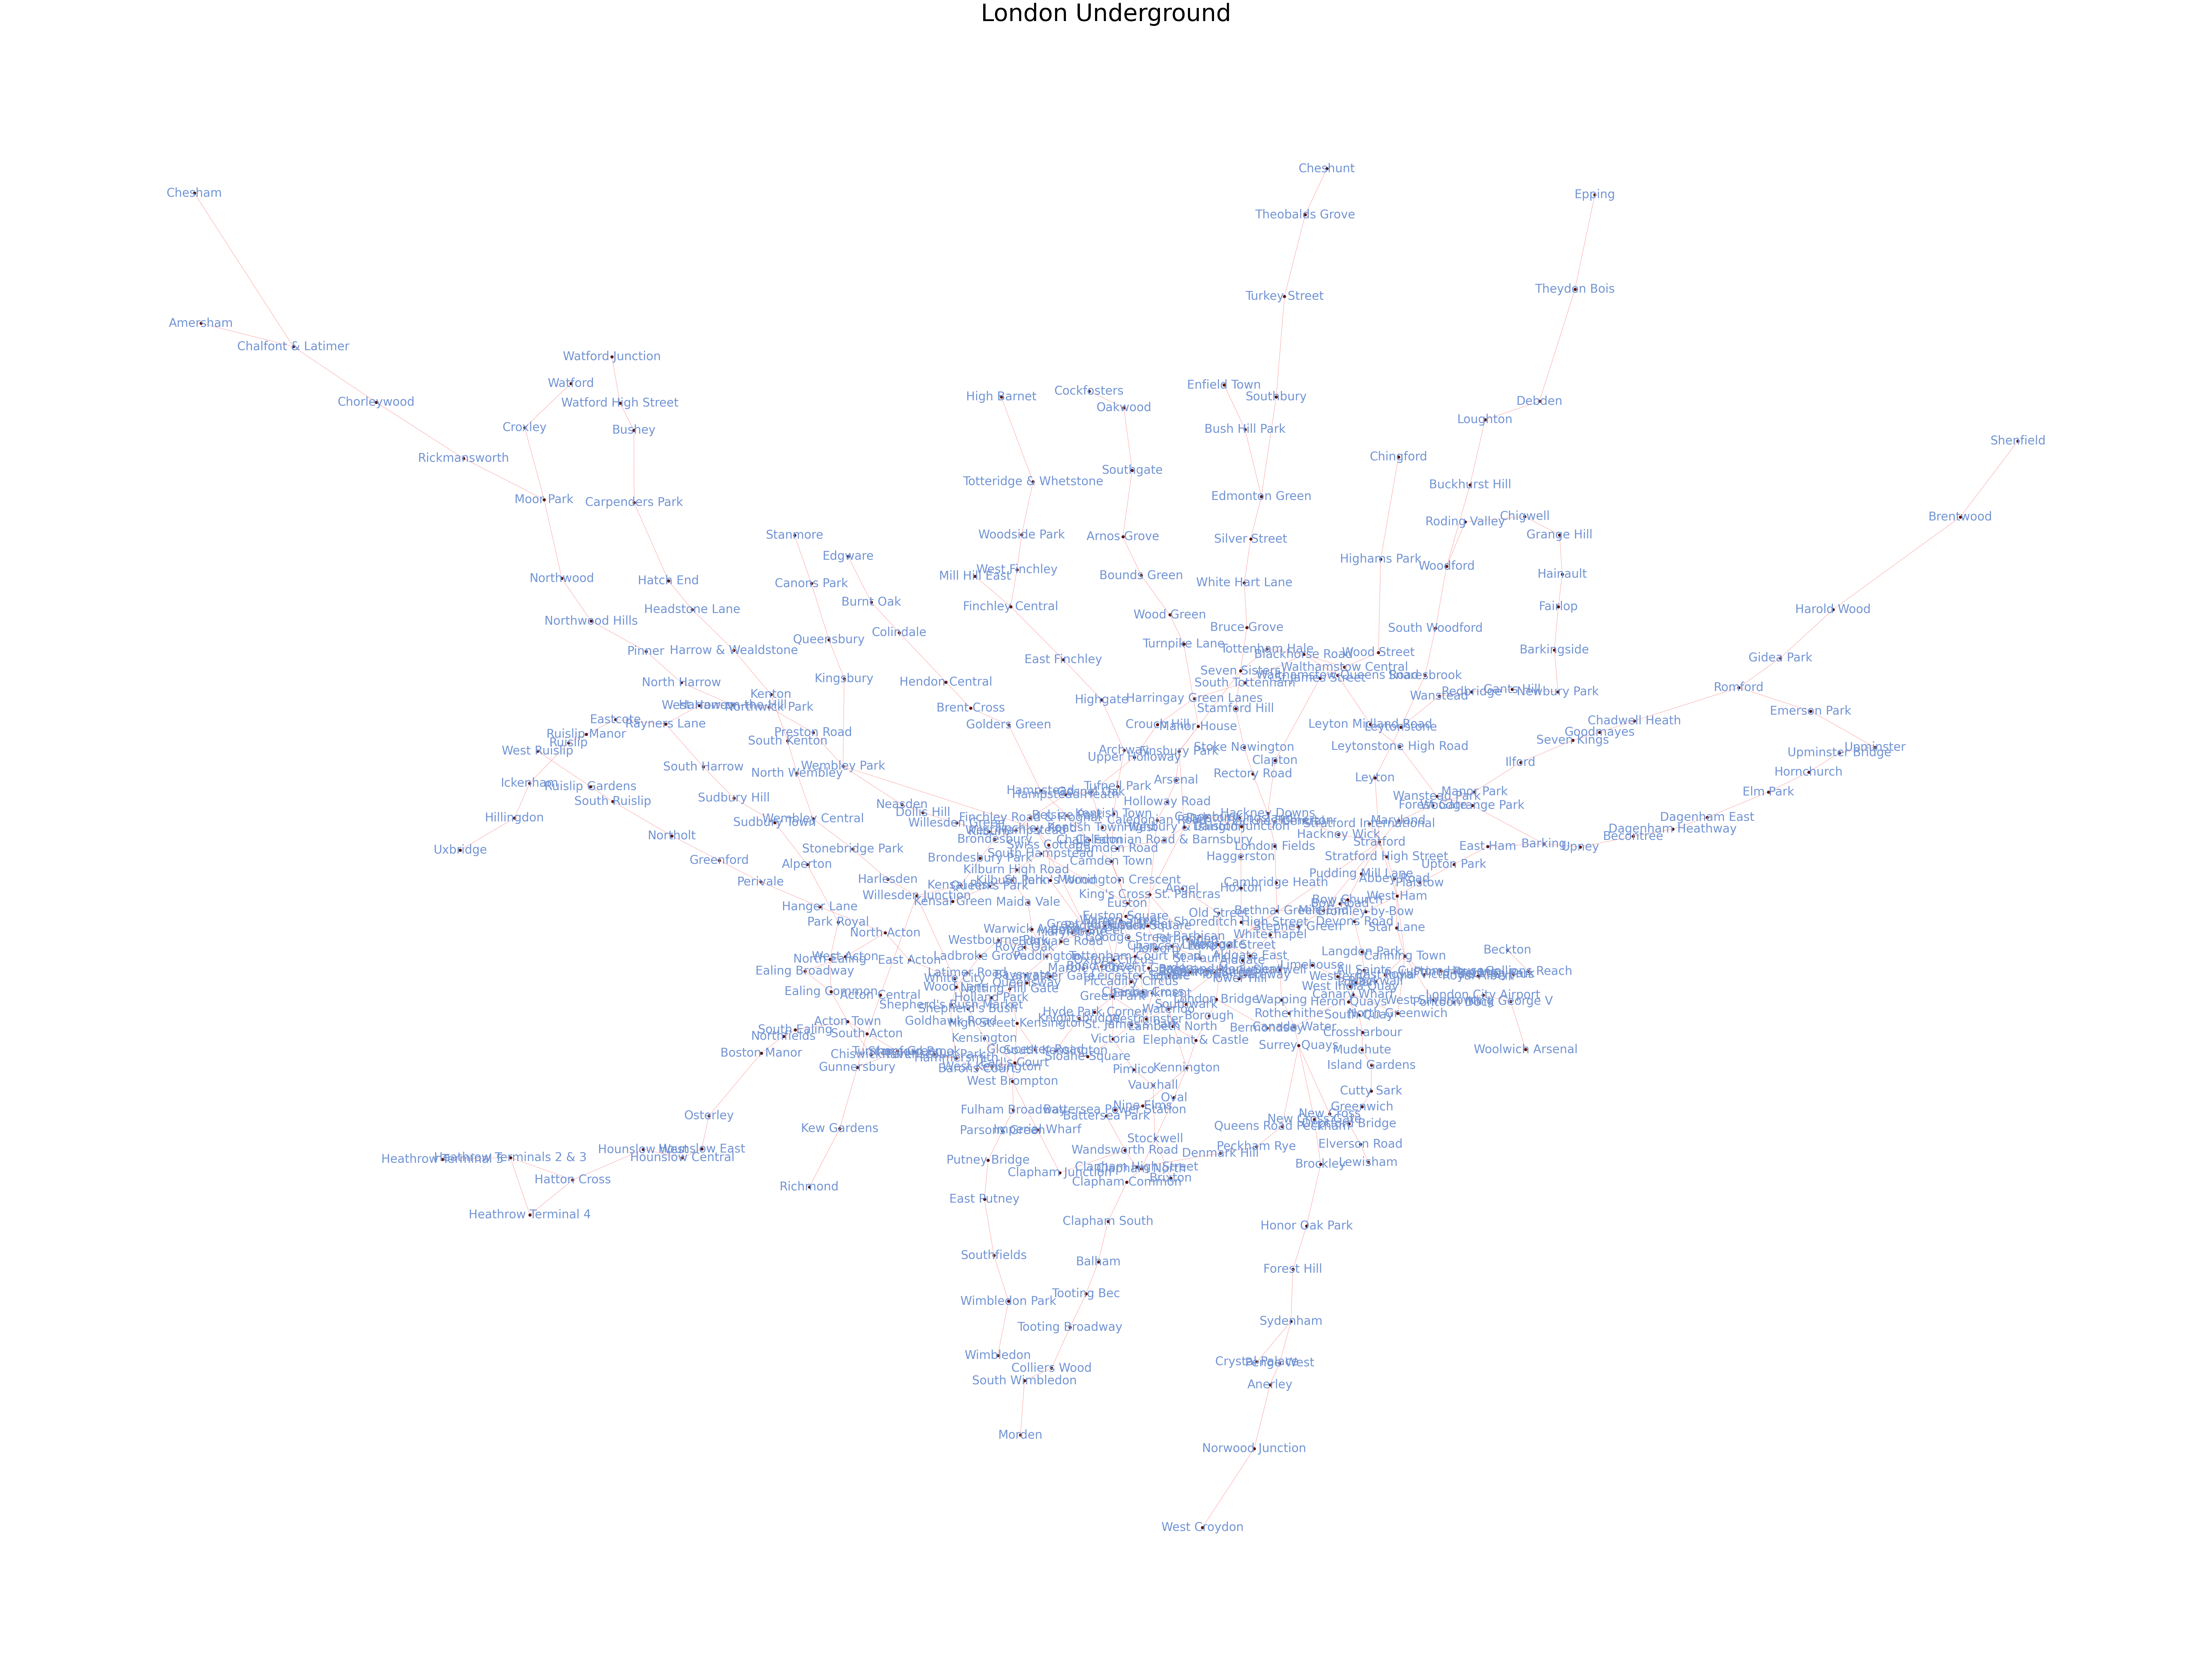

In [12]:
fig, ax = plt.subplots(figsize=(100,75))

node_labels = {node: node for node in london_graph.nodes()}
pos = nx.get_node_attributes(london_graph, 'coords')

nx.draw_networkx_nodes(london_graph, pos, node_size=50, node_color=gbp_colors[2])
nx.draw_networkx_edges(london_graph, pos, arrows=False, width=0.6, edge_color=gbp_colors[1])
nx.draw_networkx_labels(london_graph, pos, node_labels, font_size=30, font_color=gbp_colors[7])

plt.title("London Underground",fontsize=60)
plt.axis("off")
plt.show()

In [13]:
network_df = nx.to_pandas_edgelist(london_graph)

In [14]:
network_df.head()

,source,target,length,line_name,flows
0,Wembley Park,Kingsbury,2916.771558,Jubilee,12356
1,Wembley Park,Neasden,2353.165938,Jubilee,6744
2,Wembley Park,Preston Road,1419.735166,Metropolitan,36600
3,Wembley Park,Finchley Road,7266.373927,Metropolitan,55215
4,Kingsbury,Queensbury,1245.995234,Jubilee,9419


### 1.1.1 Calculate Three Centrality Measures
degree, betweenness / delta, closeness

In [15]:
degree_centrality = nx.degree_centrality(london_graph)

nx.set_node_attributes(london_graph,dict(degree_centrality),'degree_centrality')


# To dataframe using the nodes as the index
df_deg = pd.DataFrame(index=london_graph.nodes())

#
df_deg['degree_centrality'] = pd.Series(nx.get_node_attributes(london_graph, 'degree_centrality'))

df_deg_sorted = df_deg.sort_values(["degree_centrality"], ascending=False)
df_deg_sorted[0:10]

,degree_centrality
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
Green Park,0.0150
Liverpool Street,0.0150
Oxford Circus,0.0150
Earl's Court,0.0150
West Ham,0.0150
Canning Town,0.0150


In [16]:
df_deg_sorted
# convert index to column
df_deg_sorted.reset_index(level=0, inplace=True)
df_deg_sorted.rename(columns = {'index':'station_name'}, inplace = True)

In [17]:
df_deg_sorted.to_csv('degree_centrality.csv')

In [18]:
# save column to a list:df_deg['degree_centrality']
df_deg_sorted['degree_centrality'].max()

0.0225

In [19]:
betweenness_centrality = nx.betweenness_centrality(london_graph)
nx.set_node_attributes(london_graph,dict(betweenness_centrality),'betweenness_centrality')
# To dataframe using the nodes as the index
df_bet = pd.DataFrame(index=london_graph.nodes())
df_bet ['betweenness_centrality'] = pd.Series(nx.get_node_attributes(london_graph, 'betweenness_centrality'))
df_bet_sorted = df_bet.sort_values(["betweenness_centrality"], ascending=False)
df_bet_sorted[0:10]

,betweenness_centrality
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


In [20]:
# function to calculate the delta centrality defined in our lecture.
def delta_calc(input_graph):
    """
     
    """
    
    delta_centrality = {}

    original_efficiency = nx.global_efficiency(input_graph)

    for node in input_graph.nodes():
        

        graph_copy = copy.deepcopy(input_graph)
            
        graph_copy.remove_node(node)

        # Calculate the efficiency of the graph after removing the node
        removed_efficiency = nx.global_efficiency(graph_copy)

        # Calculate information centrality
        delta_centrality[node] = (original_efficiency - removed_efficiency) / original_efficiency

    return delta_centrality

In [21]:
delta_centrality = delta_calc(london_graph)
# add back to graph
nx.set_node_attributes(london_graph,dict(delta_centrality),'delta_centrality')
sorted_delta = sorted(delta_centrality.items(), key=lambda x: x[1], reverse=True)

__Delta centrality defined in our module__

In [22]:
df_delta = pd.DataFrame(sorted_delta, columns=['Station', 'Delta_Centrality'])
df_delta = df_delta.set_index('Station')

In [23]:
df_delta.head(10)

,Delta_Centrality
Station,
Stratford,0.121858
Euston,0.091412
Camden Town,0.071379
Leyton,0.067141
Leytonstone,0.062154
Canning Town,0.057365
Willesden Junction,0.052124
Finsbury Park,0.046411
Surrey Quays,0.045374


In [24]:
# add the delta_centrality back to the graph
nx.set_node_attributes(london_graph, delta_centrality, 'delta_centrality')

In [ ]:
# visualize the degree and betweenness centrality
degree_centrality_values=list(map(lambda i: i[1]['degree_centrality'], london_graph.nodes(data=True)))

max_degree = df_deg_sorted['degree_centrality'].max()
# Viz #1
node_colour =list(map(lambda i: i[1]['degree_centrality'] / max_degree, london_graph.nodes(data=True)))
# use size to represet between centrality:
node_size = list(map(lambda i: (i[1]['betweenness_centrality'] / max_degree) * 50, london_graph.nodes(data=True)))


fig, ax = plt.subplots(figsize=(16,9))

pos = nx.get_node_attributes(london_graph, 'coords')

nx.draw_networkx_edges(london_graph, pos, edge_color=gbp_colors[7], 
        width=0.4)

nodes = nx.draw_networkx_nodes(london_graph,
        pos = pos,
        node_color= node_colour,
        node_size= node_size)

plt.colorbar(nodes,
             label="Degree Centrality",
             orientation="horizontal", 
             shrink=0.5)
# add legend for size of nodes
plt.legend(numpoints=1, loc='upper left')    

plt.axis("off")
plt.title("Degree Centrality(Node Colour) & Betweenweeness Centrality (Node Size)",fontsize=15)
plt.show()

In [ ]:
# visualize the degree and betweenness centrality
degree_centrality_values=list(map(lambda i: i[1]['degree_centrality'], london_graph.nodes(data=True)))

max_degree = df_deg_sorted['degree_centrality'].max()


# Viz 2:
node_size =list(map(lambda i: i[1]['delta_centrality'] / max_degree *100, london_graph.nodes(data=True)))
node_colour= list(map(lambda i: (i[1]['degree_centrality'] / max_degree), london_graph.nodes(data=True)))



fig, ax = plt.subplots(figsize=(16,9))

pos = nx.get_node_attributes(london_graph, 'coords')

nx.draw_networkx_edges(london_graph, pos, edge_color=gbp_colors[7], 
        width=0.4)

nodes = nx.draw_networkx_nodes(london_graph,
        pos = pos,
        node_color= node_colour,
        node_size= node_size)

plt.colorbar(nodes,
             label="Degree Centrality",
             orientation="horizontal", 
             shrink=0.5)
# add legend for size of nodes
plt.legend(numpoints=1, loc='upper left')    

plt.axis("off")
plt.title("Degree Centrality(Node Colour) & Delta Centrality (Node Size)",fontsize=15)
plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(london_graph)
nx.set_node_attributes(london_graph,dict(closeness_centrality),'closeness_centrality')
# To dataframe using the nodes as the index
df_close = pd.DataFrame(index=london_graph.nodes())
df_close['closeness_centrality'] = pd.Series(nx.get_node_attributes(london_graph, 'closeness_centrality'))
df_close_sorted = df_close.sort_values(["closeness_centrality"], ascending=False)
df_close_sorted[0:10]

## 1.2 Impact Measures
Find 2 different measures to evaluate the impact of the node removal on the network. These need to 
be global measures referring to the whole network and not to specific nodes or links. Explain whether 
these two measures are specific to the London underground, or whether they could also be used to 
evaluate the resilience of any other network.
  
https://www.youtube.com/watch?v=P0PBsRASneU

In [24]:
 #We can print the dataframe from the shapefile to check the data
df_edge = nx.to_pandas_edgelist(london_graph)
df_edge[0:20]

,source,target,line_name,flows,length
0,Wembley Park,Kingsbury,Jubilee,12356,2916.771558
1,Wembley Park,Neasden,Jubilee,6744,2353.165938
2,Wembley Park,Preston Road,Metropolitan,36600,1419.735166
3,Wembley Park,Finchley Road,Metropolitan,55215,7266.373927
4,Kingsbury,Queensbury,Jubilee,9419,1245.995234
5,Queensbury,Canons Park,Jubilee,6385,1693.307343
6,Canons Park,Stanmore,Jubilee,3624,1419.669476
7,Stratford,West Ham,Jubilee,91911,1673.509515
8,Stratford,Stratford High Street,DLR,1484,519.300074
9,Stratford,Pudding Mill Lane,DLR,4606,1137.033257


In [ ]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in london_graph.edges(data='length')})

#This distance in given in meters
#if want to know the name of stations which are further away from each other
furthest_stat = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['length'] == max_dist]

#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in london_graph.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
(max_dist,furthest_stat,Baker_Street)

Largest Connected Component (LCC): This measures the size of the largest remaining connected subgraph after node removal. A smaller LCC indicates a more fragmented network.
  
Efficiency: This measures the average shortest path length between all pairs of nodes in the network. A lower efficiency indicates longer paths and reduced connectivity.

### 1.2.1 Measure 1: Network Efficiency

_Def:_


This measure ranges from [] 

 <p style="color:red">(literature to support this)</p>


_Nodal Removal Impact:_

Expected:

Observed:


_London Underground Network Context:_ In the context of a metro network like the London Underground, LLC represents the number of stations in the largest cluster of interconnected nodes within the network.  

### 1.2.2 Measure 2: Size of LLC

_Def:_
It represents the number of nodes in the largest cluster of interconnected nodes within the network.
This measure is an __integer__ as it simply reflects the total number of nodes that remain connected in the largest group after any changes or node removals. 
It's a key measure in network analysis because it shows how cohesive and connected the network remains under various conditions, such as the removal of critical nodes. <p style="color:red">(literature to support this)</p>


_Nodal Removal Impact:_

Expected:

Observed:


_London Underground Network Context:_ In the context of a metro network like the London Underground, LLC represents the number of stations in the largest cluster of interconnected nodes within the network.  

## 1.3 Node Removal
For each of the centrality measures selected in I.1. remove at least 10 nodes following two different 
strategies. A) Non-sequential removal: using the table created in I.1. remove 1 node at a time 
following the rank in the table, i.e. from the most important one to the 10

th most important one. After 
each removal, evaluate the impact of the removal using your two measures in I.2. and proceed until 
you have removed at least 10 nodes. B) Sequential: remove the highest ranked node and evaluate the 
impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest 
ranked node in the new network and evaluate the impact. Continue until removing at least 10 nodes. 

Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality 
measure reflects better the importance of a station for the functioning of the underground, which 
strategy is more effective at studying resilience, and which impact measure is better at assessing the 
damage after node removal.  

In [94]:
#degree_centrality:
degree_sorted_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)


# betweeness_centrality:
betweenness_sorted_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

# delta_centrality:
delta_sorted_nodes = sorted(delta_centrality.items(), key=lambda item: item[1], reverse=True)

# top nodes:
top_num = 15
degree_top_nodes= [node for node, _ in degree_sorted_nodes[:top_num]]
betweenness_top_nodes= [node for node, _ in betweenness_sorted_nodes[:top_num]]
delta_top_nodes= [node for node, _ in delta_sorted_nodes[:top_num]]


hold up, why not putting them in one function!

In [57]:
centrality_measure_list = [degree_centrality, betweenness_centrality, delta_centrality]

__Largest Connected Component (LCC)__

This measures the size of the largest remaining connected subgraph after node removal. A smaller LCC indicates a more fragmented network.
    
    
__Efficiency__

This measures the average shortest path length between all pairs of nodes in the network. A lower efficiency indicates longer paths and reduced connectivity.

In [115]:
def non_seq_remove_top_nodes(input_graph, centrality_node_list, n):
    """
    This function removes the top nodes from the graph

    input_graph: networkx graph
    centrality_node_list: centrality measure
    n_top_nodes: number of nodes to remove

    return: results - dict of results for plotting and analysis.
        results = {
            'non_seq_remove': list of nodes removed in non-sequential order
            'global_efficiency_sq': list of global efficiency after each node removal
            'number_of_connected_components_sq': list of number of connected components after each node removal
            }

    """
    #####################################    non-sequential removal  #####################################  
    # init dict to store results
    results = {
    'non_seq_remove': [],
    'global_efficiency_nsq': [],
    'size_lcc_nsq': []
    }

    # sort nodes by selected centrality measure
    sorted_nodes = sorted(centrality_node_list.items(), key=lambda item: item[1], reverse=True)
    # sequential removal, top n nodes:
    top_n_nodes = [node for node, _ in sorted_nodes[:n]]
    
    # non-seq copy
    non_seq_graph_copy = copy.deepcopy(input_graph)

    # Calculate global efficiency and number of connected components for non-seq removal:
    for node in top_n_nodes:
        # remove top n nodes
        non_seq_graph_copy.remove_node(node)
        #print(f"Node {node} removed")
        
        # Calculate global efficiency
        efficiency = nx.global_efficiency(non_seq_graph_copy)
        #print(f"Efficiency: {efficiency}")

        # Calculate the lcc
        lcc = len(max(nx.connected_components(non_seq_graph_copy), key=len))
        #print(f"LLC: {lcc}")

        # Append the results
        results['non_seq_remove'].append(node)
        results['global_efficiency_nsq'].append(efficiency)
        results['size_lcc_nsq'].append(lcc)

    return results
######################################################################################################

def seq_remove_top_nodes(input_graph, n, cent_measure):
    """
    This function removes the top nodes from the graph in sequential order

    input_graph: networkx graph
    centrality_node_list: centrality measure

    return: results - dict of results for plotting and analysis.
        results = {
            'seq_remove': list of nodes removed in sequential order
            'global_efficiency_sq': list of global efficiency after each node removal
            'number_of_connected_components_sq': list of number of connected components after each node removal
            }

    """

    ########################################    sequential removal  ######################################

    results = {
        'seq_remove': [],
        'global_efficiency_sq': [],
        'size_lcc_sq': []
    }

    graph_copy = copy.deepcopy(input_graph)

    for i in range(n):
    # sort nodes by selected centrality measure:
        if cent_measure == 'degree':
            centrality = nx.degree_centrality(graph_copy)

        elif cent_measure == 'between':
            centrality = nx.betweenness_centrality(graph_copy)
        
        elif cent_measure == 'delta':
            centrality = delta_calc(graph_copy) 
        else:
            print("invalid selection of centrality measure")
        
        # Sort nodes by centrality and select the node with the highest score
        sorted_nodes = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
        node_to_remove = sorted_nodes[0][0]  # Get the node (first element of the tuple)
        print(f"Node {node_to_remove} removed")

        # Log the node and remove it from the graph
        results['seq_remove'].append(node_to_remove)
        graph_copy.remove_node(node_to_remove)

        # Recalculate and store global efficiency and LCC size
        efficiency = nx.global_efficiency(graph_copy)
        lcc = len(max(nx.connected_components(graph_copy), key=len))
        results['global_efficiency_sq'].append(efficiency)
        results['size_lcc_sq'].append(lcc)

    ######################################################################################################
    return results

In [116]:
#test_res = non_seq_remove_top_nodes(london_graph, degree_centrality, 10)
#test_res = seq_remove_top_nodes(london_graph, 10, 'degree')
num_node_drop = 20
# degree
deg_nsq = non_seq_remove_top_nodes(london_graph, degree_centrality, num_node_drop)
deg_sq = seq_remove_top_nodes(london_graph, num_node_drop, 'degree')

# betweenness
bet_nsq = non_seq_remove_top_nodes(london_graph, betweenness_centrality, num_node_drop)
bet_sq = seq_remove_top_nodes(london_graph, num_node_drop, 'between')

# delta
del_nsq = non_seq_remove_top_nodes(london_graph, delta_centrality, num_node_drop)
del_sq = seq_remove_top_nodes(london_graph, num_node_drop, 'delta')

Node Stratford removed
Node Bank and Monument removed
Node Baker Street removed
Node King's Cross St. Pancras removed
Node Canning Town removed
Node Green Park removed
Node Earl's Court removed
Node Waterloo removed
Node Turnham Green removed
Node Willesden Junction removed
Node Oxford Circus removed
Node Wembley Park removed
Node West Ham removed
Node Canary Wharf removed
Node West Hampstead removed
Node Shadwell removed
Node Poplar removed
Node Notting Hill Gate removed
Node Paddington removed
Node Liverpool Street removed
Node Stratford removed
Node King's Cross St. Pancras removed
Node Waterloo removed
Node Bank and Monument removed
Node Canada Water removed
Node West Hampstead removed
Node Earl's Court removed
Node Shepherd's Bush removed
Node Euston removed
Node Baker Street removed
Node Acton Town removed
Node West Ham removed
Node Whitechapel removed
Node Paddington removed
Node Blackhorse Road removed
Node Seven Sisters removed
Node Harrow-on-the-Hill removed
Node Victoria rem

### 1.3.1. Degree Non-seq vs Seq Removal:

In [ ]:
def normalize_values(values):
    max_val = 500
    min_val = 300
    normalized = [(x - min_val) / (max_val - min_val) for x in values]
    return normalized

# Example usage
test_values = [300, 400, 500]  # Sample data
normalized_values = normalize_values(test_values)

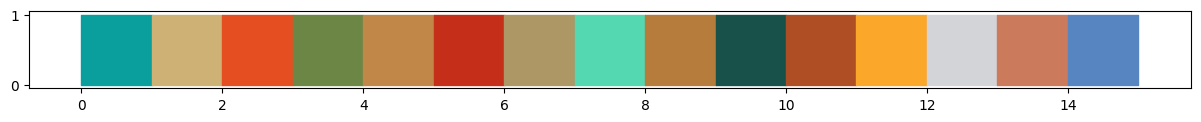

In [120]:
# Now let's plot color pallette
plt.figure(figsize=(15, 1))
for i, color in enumerate(asteroid_city_col):
    plt.fill_between([i, i + 1], 0, 1, color=color)

for all seq vs. non-seq grapph plots:

In [ ]:
def seq_vs_non_seq_plot(nsq_res, sq_res, centrality_selection):
    # plot degree centrality non-sequential vs. sequential
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 18))

    #plt.plot(deg_nsq['global_efficiency_nsq'], label='Degree Centrality Non-Sequential', color=asteroid_city_col[0])

    #plt.plot(deg_sq['global_efficiency_sq'], label='Degree Centrality Sequential', color=asteroid_city_col[1])
    # Plot Global Efficiency on the first subplot
    ax1.plot(nsq_res['global_efficiency_nsq'], label=centrality_selection + 'Non-Sequential', color=asteroid_city_col[0])
    ax1.plot(sq_res['global_efficiency_sq'], label=centrality_selection + ' Sequential', color=asteroid_city_col[1])
    ax1.set_title("Global Efficiency: Non-Sequential vs. Sequential", fontsize=15)
    ax1.set_xlabel("Number of Nodes Removed")
    ax1.set_ylabel("Global Efficiency")
    ax1.legend()
    # Plot Global Efficiency on the first subplot
    ax1.plot(nsq_res['global_efficiency_nsq'], label= centrality_selection + ' Non-Sequential', color=asteroid_city_col[0])
    ax1.plot(sq_res['global_efficiency_sq'], label= centrality_selection + ' Sequential', color=asteroid_city_col[1])
    ax1.set_title("Size of LCC: Non-Sequential vs. Sequential", fontsize=15)
    ax1.set_xlabel("Number of Nodes Removed")
    ax1.set_ylabel("Global Efficiency")
    ax1.legend()
    # plt.plot(deg_nsq['size_lcc_nsq'], label='Degree Centrality Non-Sequential', color=asteroid_city_col[2])

    # plt.plot(deg_sq['size_lcc_sq'], label='Degree Centrality Sequential', color=asteroid_city_col[4])

    # plt.title("Degree Centrality: Global Efficiency & Size of Largest Connected Component", fontsize=15)

    # plt.xlabel("Number of Nodes Removed")

    # plt.ylabel("Global Efficiency")

    # plt.legend()

    # plt.show()
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


### 1.3.2. Bet, Delta Non-seq vs Seq Removal: